In [2]:
!pip install ultralytics --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 90.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip uninstall opencv-python opencv-python-headless -y

Found existing installation: opencv-python 4.12.0.88
Uninstalling opencv-python-4.12.0.88:
  Successfully uninstalled opencv-python-4.12.0.88
Found existing installation: opencv-python-headless 4.12.0.88
Uninstalling opencv-python-headless-4.12.0.88:
  Successfully uninstalled opencv-python-headless-4.12.0.88


In [6]:
!pip install opencv-python==4.8.0.76

In [7]:
!pip uninstall -y numpy

Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6


In [9]:
!pip install numpy==1.26.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 94.0 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
datasets 4.4.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.32.5 which is incompatible.
google-colab 1.0.0 requires tornado==6.4.2, but you have tornado 6.5.2 which is incompatible

In [10]:
# ============================================================================
# STEP 1: Load LFW Dataset and YOLOv8-Face Model (STABLE VERSION)
# ============================================================================

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO
import warnings
import shutil

# Suppress warnings
warnings.filterwarnings('ignore')

print("Starting Step 1: Loading Dataset and Model...\n")

# ============================================================================
# 1.1: Extract LFW Dataset
# ============================================================================

print("="*60)
print("Extracting LFW Dataset...")
print("="*60)

lfw_tgz_path = '/kaggle/input/lfwpeople/lfw-funneled.tgz'
!tar -xzf {lfw_tgz_path} -C /kaggle/working/

lfw_path = Path('/kaggle/working/lfw_funneled')
if lfw_path.exists():
    print(f"✓ Dataset extracted to: {lfw_path}")
else:
    raise FileNotFoundError("✗ LFW extraction failed!")

# ============================================================================
# 1.2: Explore Dataset Structure
# ============================================================================

print("\n" + "="*60)
print("Dataset Statistics")
print("="*60)

identities = sorted([d for d in lfw_path.iterdir() if d.is_dir()])
total_images = sum(len(list(d.glob('*.jpg'))) for d in identities)

print(f"Total identities: {len(identities)}")
print(f"Total images: {total_images}")

print("\nFirst 10 identities:")
for i, identity in enumerate(identities[:10]):
    num_images = len(list(identity.glob('*.jpg')))
    print(f"  {i+1}. {identity.name}: {num_images} images")

# ============================================================================
# 1.3: Load YOLOv8-Face Model
# ============================================================================

print("\n" + "="*60)
print("Loading YOLOv8-Face Model...")
print("="*60)

model_path = '/kaggle/input/yolo8face/yolov8n-face.pt'
model = YOLO(model_path)
print(f"✓ Model loaded from: {model_path}")

Starting Step 1: Loading Dataset and Model...

Extracting LFW Dataset...
✓ Dataset extracted to: /kaggle/working/lfw_funneled

Dataset Statistics
Total identities: 5749
Total images: 13233

First 10 identities:
  1. AJ_Cook: 1 images
  2. AJ_Lamas: 1 images
  3. Aaron_Eckhart: 1 images
  4. Aaron_Guiel: 1 images
  5. Aaron_Patterson: 1 images
  6. Aaron_Peirsol: 4 images
  7. Aaron_Pena: 1 images
  8. Aaron_Sorkin: 2 images
  9. Aaron_Tippin: 1 images
  10. Abba_Eban: 1 images

Loading YOLOv8-Face Model...
✓ Model loaded from: /kaggle/input/yolo8face/yolov8n-face.pt


In [11]:
# ============================================================================
# STEP 1.4: Filter Identities with >= 2 Images
# ============================================================================

print("\n" + "="*60)
print("Filtering identities with at least 2 images...")
print("="*60)

filtered_path = Path("/kaggle/working/lfw_filtered")
if filtered_path.exists():
    shutil.rmtree(filtered_path)
filtered_path.mkdir(parents=True, exist_ok=True)

valid_identities = []
total_filtered_images = 0

for identity in identities:
    images = list(identity.glob("*.jpg"))
    if len(images) >= 2:   # keep only identities with >=2 images
        valid_identities.append(identity)
        
        # Create folder in filtered dataset
        target_folder = filtered_path / identity.name
        target_folder.mkdir(parents=True, exist_ok=True)
        
        # Copy images
        for img in images:
            shutil.copy(img, target_folder)
        
        total_filtered_images += len(images)

print(f"✓ Total identities with >=2 images: {len(valid_identities)}")
print(f"✓ Total images copied: {total_filtered_images}")
print(f"✓ Filtered dataset saved at: {filtered_path}")

print("\nFirst 10 valid identities:")
for i, identity in enumerate(valid_identities[:10]):
    print(f"  {i+1}. {identity.name} ({len(list(identity.glob('*.jpg')))} images)")



Filtering identities with at least 2 images...
✓ Total identities with >=2 images: 1680
✓ Total images copied: 9164
✓ Filtered dataset saved at: /kaggle/working/lfw_filtered

First 10 valid identities:
  1. Aaron_Peirsol (4 images)
  2. Aaron_Sorkin (2 images)
  3. Abdel_Nasser_Assidi (2 images)
  4. Abdoulaye_Wade (4 images)
  5. Abdullah (4 images)
  6. Abdullah_Gul (19 images)
  7. Abdullah_al-Attiyah (3 images)
  8. Abdullatif_Sener (2 images)
  9. Abel_Pacheco (4 images)
  10. Abid_Hamid_Mahmud_Al-Tikriti (3 images)


In [12]:
# ============================================================================
# STEP 1.5: Train-Test Split (1 image in test per identity)
# ============================================================================

print("\n" + "="*60)
print("Splitting dataset into Train/Test...")
print("="*60)

split_path = Path("/kaggle/working/lfw_split")
train_path = split_path / "train"
test_path = split_path / "test"

# Clean old folder
if split_path.exists():
    shutil.rmtree(split_path)

train_path.mkdir(parents=True, exist_ok=True)
test_path.mkdir(parents=True, exist_ok=True)

for identity in valid_identities:
    images = sorted(list((filtered_path / identity.name).glob("*.jpg")))
    
    if len(images) < 2:
        continue  # safety check (should not happen)
    
    # Create identity folders
    (train_path / identity.name).mkdir(parents=True, exist_ok=True)
    (test_path / identity.name).mkdir(parents=True, exist_ok=True)
    
    # Select ONE image randomly for test
    test_img = images[0]   # deterministic: first image
    shutil.copy(test_img, test_path / identity.name / test_img.name)
    
    # Remaining go to train
    for img in images[1:]:
        shutil.copy(img, train_path / identity.name / img.name)

print("✓ Train/Test Split Completed!")
print(f"Train directory: {train_path}")
print(f"Test directory:  {test_path}")

# Summary
num_train_ids = len([d for d in train_path.iterdir() if d.is_dir()])
num_test_ids = len([d for d in test_path.iterdir() if d.is_dir()])
num_train_imgs = sum(len(list(d.glob("*.jpg"))) for d in train_path.iterdir())
num_test_imgs = sum(len(list(d.glob("*.jpg"))) for d in test_path.iterdir())

print(f"\nTotal identities in train: {num_train_ids}")
print(f"Total identities in test:  {num_test_ids}")
print(f"Total train images: {num_train_imgs}")
print(f"Total test images:  {num_test_imgs}")



Splitting dataset into Train/Test...
✓ Train/Test Split Completed!
Train directory: /kaggle/working/lfw_split/train
Test directory:  /kaggle/working/lfw_split/test

Total identities in train: 1680
Total identities in test:  1680
Total train images: 7484
Total test images:  1680


In [13]:
import os
import cv2
import numpy as np
from pathlib import Path
from ultralytics import YOLO
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# ==========================
# Face Detection & Cropping
# ==========================
def detect_faces(image_path, model, conf_threshold=0.25):
    image = cv2.imread(str(image_path))
    if image is None:
        return None, []
    results = model(image, conf=conf_threshold, verbose=False)
    faces = []
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            conf = box.conf[0].cpu().numpy()
            faces.append((int(x1), int(y1), int(x2), int(y2), float(conf)))
    return image, faces


def crop_face_with_margin(image, bbox, margin=0.3, target_size=(112, 112)):
    x1, y1, x2, y2 = [int(v) for v in bbox[:4]]
    w, h = x2 - x1, y2 - y1
    margin_w, margin_h = int(w * margin), int(h * margin)
    x1_new = max(0, x1 - margin_w)
    y1_new = max(0, y1 - margin_h)
    x2_new = min(image.shape[1], x2 + margin_w)
    y2_new = min(image.shape[0], y2 + margin_h)
    cropped = image[y1_new:y2_new, x1_new:x2_new]
    if cropped.size > 0:
        return cv2.resize(cropped, target_size, interpolation=cv2.INTER_AREA)
    else:
        return np.zeros((*target_size[::-1], 3), dtype=np.uint8)


# ==========================
# Preprocessing Techniques
# ==========================
def preprocess_face(face_img):
    """
    Apply multiple preprocessing techniques to a cropped face.
    Returns dict of processed images.
    """
    processed = {}
    
    processed['original'] = face_img.copy()
    
    # Grayscale
    gray = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
    processed['gray'] = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    
    # Histogram equalization
    hist_eq = cv2.equalizeHist(gray)
    processed['hist_eq'] = cv2.cvtColor(hist_eq, cv2.COLOR_GRAY2BGR)
    
    # Normalized (0-1 float)
    normalized = face_img.astype(np.float32) / 255.0
    processed['normalized'] = (normalized * 255).astype(np.uint8)
    
    # Gaussian blur
    processed['blur'] = cv2.GaussianBlur(face_img, (3, 3), 0)
    
    # Sharpen
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    processed['sharpen'] = cv2.filter2D(face_img, -1, kernel)
    
    return processed

# ============================================================================
# STEP 2: APPLY PREPROCESSING TO TRAIN AND TEST SPLITS
# ============================================================================

print("\n" + "="*60)
print("Applying preprocessing pipeline to Train and Test...")
print("="*60)

# Paths
split_root = Path("/kaggle/working/lfw_split")
train_root = split_root / "train"
test_root = split_root / "test"

output_root = Path("/kaggle/working/lfw_preprocessed")
if output_root.exists():
    shutil.rmtree(output_root)
(output_root / "train").mkdir(parents=True, exist_ok=True)
(output_root / "test").mkdir(parents=True, exist_ok=True)

# Load YOLOv8 Face Detector
model_path = "/kaggle/input/yolo8face/yolov8n-face.pt"
face_model = YOLO(model_path)

# Helper function to process a folder (train or test)
def process_split(split_name, split_path):
    print(f"\nProcessing {split_name}...")

    output_path = output_root / split_name
    output_path.mkdir(exist_ok=True)

    identities = sorted([d for d in split_path.iterdir() if d.is_dir()])

    for identity in tqdm(identities, desc=f"{split_name} identities"):
        save_identity_path = output_path / identity.name
        save_identity_path.mkdir(exist_ok=True)

        images = sorted(list(identity.glob("*.jpg")))

        for img_path in images:

            # Face Detection
            img, faces = detect_faces(img_path, face_model)
            if img is None or len(faces) == 0:
                continue

            # Take highest confidence face
            best_face = max(faces, key=lambda x: x[4])
            cropped_face = crop_face_with_margin(img, best_face)

            # Preprocess (gray, blur, normalize, etc.)
            processed_dict = preprocess_face(cropped_face)

            # Save each variant
            base_name = img_path.stem
            for key, processed_img in processed_dict.items():
                save_file = save_identity_path / f"{base_name}_{key}.jpg"
                cv2.imwrite(str(save_file), processed_img)

    print(f"✓ Finished processing {split_name}. Saved to: {output_path}")


# ---- Process training and testing ----
process_split("train", train_root)
process_split("test", test_root)

print("\n✓ ALL DONE! Preprocessed dataset stored at:")
print(output_root)



Applying preprocessing pipeline to Train and Test...

Processing train...


train identities: 100%|██████████| 1680/1680 [01:30<00:00, 18.66it/s]


✓ Finished processing train. Saved to: /kaggle/working/lfw_preprocessed/train

Processing test...


test identities: 100%|██████████| 1680/1680 [00:20<00:00, 83.47it/s]

✓ Finished processing test. Saved to: /kaggle/working/lfw_preprocessed/test

✓ ALL DONE! Preprocessed dataset stored at:
/kaggle/working/lfw_preprocessed


In [14]:
# ============================================================================
# STEP 3: VRP-SAM LOADING
# ============================================================================

import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
import cv2

print("Starting Step 3: VRP-SAM Face Segmentation Integration...\n")

# ============================================================================
# 3.1: Install and Import SAM
# ============================================================================

print("="*60)
print("Installing Segment Anything Model (SAM)...")
print("="*60)

!pip install segment-anything -q

from segment_anything import sam_model_registry, SamPredictor

print("✓ SAM installed successfully")

# ============================================================================
# 3.2: Download SAM Model
# ============================================================================

print("\n" + "="*60)
print("Downloading SAM Model Weights...")
print("="*60)

# Download SAM checkpoint (using ViT-B for balance of speed/accuracy)
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

sam_checkpoint = "sam_vit_b_01ec64.pth"
model_type = "vit_b"
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"✓ SAM checkpoint downloaded: {sam_checkpoint}")
print(f"✓ Using device: {device}")

# ============================================================================
# 3.3: Load SAM Model
# ============================================================================

print("\n" + "="*60)
print("Loading SAM Model...")
print("="*60)

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

print("✓ SAM model loaded successfully")


Starting Step 3: VRP-SAM Face Segmentation Integration...

Installing Segment Anything Model (SAM)...
✓ SAM installed successfully

✓ SAM checkpoint downloaded: sam_vit_b_01ec64.pth
✓ Using device: cuda

Loading SAM Model...
✓ SAM model loaded successfully


In [15]:
# ============================================================================
# Clean VRP-SAM Pipeline for Large Dataset (Train/Test)
# ============================================================================

import cv2
import numpy as np
from pathlib import Path
from tqdm import tqdm

def crop_face_with_margin(image, bbox, target_size=(112, 112), margin=0.3):
    """
    Crop a face with a margin and resize to target size.
    """
    x1, y1, x2, y2 = [int(v) for v in bbox[:4]]
    w, h = x2 - x1, y2 - y1
    margin_w, margin_h = int(w * margin), int(h * margin)
    x1_new = max(0, x1 - margin_w)
    y1_new = max(0, y1 - margin_h)
    x2_new = min(image.shape[1], x2 + margin_w)
    y2_new = min(image.shape[0], y2 + margin_h)
    cropped = image[y1_new:y2_new, x1_new:x2_new]
    if cropped.size > 0:
        return cv2.resize(cropped, target_size, interpolation=cv2.INTER_AREA)
    else:
        return np.zeros((*target_size[::-1], 3), dtype=np.uint8)

def process_face_with_vrp_sam(image, bbox, sam_predictor, target_size=(112, 112)):
    """
    Segment face using SAM and crop with margin.
    """
    # Segment with SAM
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    sam_predictor.set_image(image_rgb)
    x1, y1, x2, y2 = [int(v) for v in bbox[:4]]
    masks, _, _ = sam_predictor.predict(
        point_coords=None,
        point_labels=None,
        box=np.array([[x1, y1, x2, y2]]),
        multimask_output=False
    )
    mask = masks[0]
    masked_face = image.copy()
    masked_face[~mask] = 0  # remove background
    
    # Crop with margin
    cropped_resized = crop_face_with_margin(masked_face, bbox, target_size)
    
    metadata = {
        'status': 'success',
        'bbox': bbox,
        'mask_area': np.sum(mask)
    }
    return cropped_resized, metadata

def process_dataset_with_vrp_sam(dataset_path, yolo_model, sam_predictor,
                                 output_dir='/kaggle/working/processed_faces',
                                 target_size=(112, 112), max_images=None):
    """
    Full pipeline for large dataset: YOLO → VRP-SAM → Crop & Resize
    Saves processed faces in the same folder structure as the original dataset.
    """
    dataset_path = Path(dataset_path)
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)
    
    images = list(dataset_path.glob('*/*.jpg'))
    if max_images:
        images = images[:max_images]
    
    stats = {'total': 0, 'success': 0, 'no_face': 0, 'multiple_faces': 0}

    for img_path in tqdm(images, desc="Processing Dataset with VRP-SAM"):
        stats['total'] += 1
        
        # YOLO face detection
        image, faces = detect_faces(img_path, yolo_model)
        if image is None or len(faces) == 0:
            stats['no_face'] += 1
            continue
        
        if len(faces) > 1:
            stats['multiple_faces'] += 1
        largest_face = max(faces, key=lambda f: (f[2]-f[0]) * (f[3]-f[1]))
        
        # VRP-SAM segmentation
        processed_face, metadata = process_face_with_vrp_sam(image, largest_face, sam_predictor, target_size)
        if metadata['status'] != 'success':
            continue
        stats['success'] += 1
        
        # Save processed face (keep original folder structure)
        identity_dir = output_dir / img_path.parent.name
        identity_dir.mkdir(exist_ok=True)
        output_path = identity_dir / img_path.name
        cv2.imwrite(str(output_path), processed_face)

    print("\nProcessing Complete")
    print(stats)
    return stats



In [17]:
# ============================================================================
# Train/Test Directories
# ============================================================================
train_folder = '/kaggle/working/lfw_split/train'
test_folder  = '/kaggle/working/lfw_split/test'

# ============================================================================
# NEW OUTPUT FOLDERS (VRP-SAM processed)
# ============================================================================
output_train = '/kaggle/working/vrp_processed_train'
output_test  = '/kaggle/working/vrp_processed_test'

# ============================================================================
# Process Train Set
# ============================================================================
train_stats = process_dataset_with_vrp_sam(train_folder, model, predictor, output_train)
print("✓ VRP-SAM Train set processed:", train_stats)

# ============================================================================
# Process Test Set
# ============================================================================
test_stats = process_dataset_with_vrp_sam(test_folder, model, predictor, output_test)
print("✓ VRP-SAM Test set processed:", test_stats)


Processing Dataset with VRP-SAM: 100%|██████████| 7484/7484 [1:03:04<00:00,  1.98it/s]



Processing Complete
{'total': 7484, 'success': 7482, 'no_face': 2, 'multiple_faces': 1583}
✓ VRP-SAM Train set processed: {'total': 7484, 'success': 7482, 'no_face': 2, 'multiple_faces': 1583}


Processing Dataset with VRP-SAM: 100%|██████████| 1680/1680 [14:09<00:00,  1.98it/s]


Processing Complete
{'total': 1680, 'success': 1680, 'no_face': 0, 'multiple_faces': 412}
✓ VRP-SAM Test set processed: {'total': 1680, 'success': 1680, 'no_face': 0, 'multiple_faces': 412}


Starting Step 5: Face Recognition Training...

Using VRP-SAM preprocessed dataset

Loading VRP-SAM processed dataset...
Dataset loaded: 7482 images, 1680 identities
Dataset loaded: 1680 images, 1680 identities
✓ Train dataset: 7482 samples
✓ Val dataset: 1680 samples
✓ Classes: 1680

Initializing model and training setup...
Using device: cuda
✓ Model initialized
✓ Total parameters: 563,200

Training face recognition model...


Epoch 1/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 26.41it/s, loss=39.6177, acc=0.01%]


Epoch [1/20]
  Train: Loss=41.6143, Acc=0.01%
  Val:   Loss=42.3586, Acc=0.00%
  Best Val Acc: 0.00%


Epoch 2/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 27.04it/s, loss=37.4634, acc=1.11%]


Epoch [2/20]
  Train: Loss=39.0953, Acc=1.11%
  Val:   Loss=41.0485, Acc=0.00%
  Best Val Acc: 0.00%


Epoch 3/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 27.46it/s, loss=36.3782, acc=2.09%]


Epoch [3/20]
  Train: Loss=36.8815, Acc=2.09%
  Val:   Loss=39.9644, Acc=0.06%
  Best Val Acc: 0.06%


Epoch 4/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 27.51it/s, loss=31.3041, acc=2.58%]


Epoch [4/20]
  Train: Loss=34.4149, Acc=2.58%
  Val:   Loss=37.1396, Acc=0.06%
  Best Val Acc: 0.06%


Epoch 5/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 27.31it/s, loss=29.5198, acc=2.02%]


Epoch [5/20]
  Train: Loss=31.4190, Acc=2.02%
  Val:   Loss=32.2114, Acc=0.06%
  Best Val Acc: 0.06%


Epoch 6/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 27.61it/s, loss=22.1146, acc=1.75%]


Epoch [6/20]
  Train: Loss=25.6981, Acc=1.75%
  Val:   Loss=22.7355, Acc=0.00%
  Best Val Acc: 0.06%


Epoch 7/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 27.52it/s, loss=11.4702, acc=0.41%]


Epoch [7/20]
  Train: Loss=17.1640, Acc=0.41%
  Val:   Loss=11.3814, Acc=0.00%
  Best Val Acc: 0.06%


Epoch 8/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 27.41it/s, loss=2.0065, acc=62.06%]


Epoch [8/20]
  Train: Loss=5.9776, Acc=62.06%
  Val:   Loss=30.6992, Acc=0.77%
  Best Val Acc: 0.77%


Epoch 9/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 27.49it/s, loss=2.0116, acc=93.89%]


Epoch [9/20]
  Train: Loss=2.0411, Acc=93.89%
  Val:   Loss=4.9479, Acc=76.55%
  Best Val Acc: 76.55%


Epoch 10/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 28.18it/s, loss=3.9847, acc=90.48%]


Epoch [10/20]
  Train: Loss=2.3567, Acc=90.48%
  Val:   Loss=5.2774, Acc=75.24%
  Best Val Acc: 76.55%


Epoch 11/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 27.50it/s, loss=2.4740, acc=89.01%]


Epoch [11/20]
  Train: Loss=2.5930, Acc=89.01%
  Val:   Loss=2.4752, Acc=90.06%
  Best Val Acc: 90.06%


Epoch 12/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 27.74it/s, loss=2.6654, acc=90.67%]


Epoch [12/20]
  Train: Loss=2.3120, Acc=90.67%
  Val:   Loss=2.7876, Acc=88.75%
  Best Val Acc: 90.06%


Epoch 13/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 27.68it/s, loss=1.1831, acc=89.70%]


Epoch [13/20]
  Train: Loss=2.3013, Acc=89.70%
  Val:   Loss=1.3325, Acc=96.07%
  Best Val Acc: 96.07%


Epoch 14/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 27.68it/s, loss=1.1493, acc=93.40%]


Epoch [14/20]
  Train: Loss=1.6718, Acc=93.40%
  Val:   Loss=1.3306, Acc=95.60%
  Best Val Acc: 96.07%


Epoch 15/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 27.53it/s, loss=1.2421, acc=94.13%] 


Epoch [15/20]
  Train: Loss=1.6213, Acc=94.13%
  Val:   Loss=1.3652, Acc=96.37%
  Best Val Acc: 96.37%


Epoch 16/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 27.45it/s, loss=1.1376, acc=93.13%]


Epoch [16/20]
  Train: Loss=1.7853, Acc=93.13%
  Val:   Loss=1.2430, Acc=95.77%
  Best Val Acc: 96.37%


Epoch 17/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 27.85it/s, loss=3.3238, acc=92.98%]


Epoch [17/20]
  Train: Loss=1.7280, Acc=92.98%
  Val:   Loss=3.1961, Acc=85.18%
  Best Val Acc: 96.37%


Epoch 18/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 27.70it/s, loss=1.1643, acc=92.19%] 


Epoch [18/20]
  Train: Loss=1.9037, Acc=92.19%
  Val:   Loss=1.5954, Acc=93.57%
  Best Val Acc: 96.37%


Epoch 19/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 27.36it/s, loss=1.7015, acc=91.59%]


Epoch [19/20]
  Train: Loss=1.8499, Acc=91.59%
  Val:   Loss=2.4405, Acc=87.92%
  Best Val Acc: 96.37%


Epoch 20/20 [Train]: 100%|██████████| 234/234 [00:08<00:00, 27.70it/s, loss=1.1190, acc=94.77%]


Epoch [20/20]
  Train: Loss=1.3676, Acc=94.77%
  Val:   Loss=1.3321, Acc=95.00%
  Best Val Acc: 96.37%

✓ Training completed!


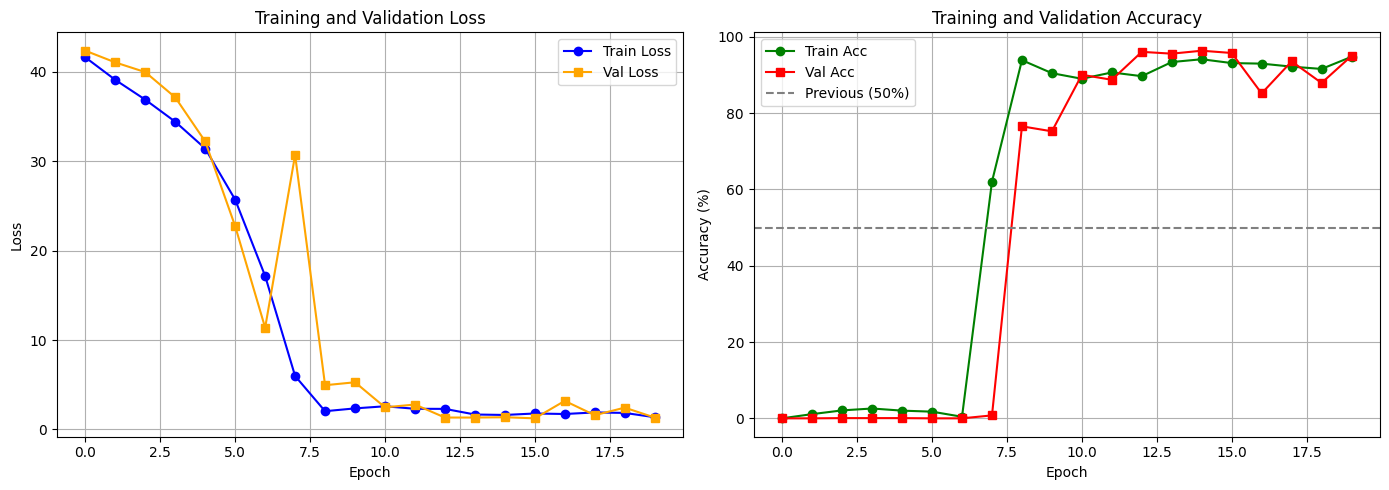


STEP 5 COMPLETE ✓
Best validation accuracy: 96.37%
Final train accuracy: 94.77%

✓ VRP-SAM preprocessing used
✓ Model saved: face_recognition_model.pth


In [18]:
# ============================================================================
# STEP 5: Face Recognition Training on VRP-SAM Preprocessed Dataset
# ============================================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from pathlib import Path
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# ============================================================================
# 5.0: Intro
# ============================================================================
def step5_intro():
    print("Starting Step 5: Face Recognition Training...\n")
    print("Using VRP-SAM preprocessed dataset\n")

# ============================================================================
# 5.1: Dataset Class
# ============================================================================
class FaceDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = Path(root_dir)
        self.transform = transform
        
        self.identities = sorted([d for d in self.root_dir.iterdir() if d.is_dir()])
        self.identity_to_idx = {identity.name: idx for idx, identity in enumerate(self.identities)}
        
        self.samples = []
        for identity in self.identities:
            label = self.identity_to_idx[identity.name]
            images = list(identity.glob('*.jpg'))
            for img_path in images:
                self.samples.append((str(img_path), label))
        
        print(f"Dataset loaded: {len(self.samples)} images, {len(self.identities)} identities")
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        if self.transform:
            image = self.transform(image)
        
        return image, label
    
    def get_num_classes(self):
        return len(self.identities)

# ============================================================================
# 5.2: Dataset Loading Function
# ============================================================================
def load_dataset(train_base, val_base, train_transform, val_transform, FaceDataset):
    print("="*60)
    print("Loading VRP-SAM processed dataset...")
    print("="*60)

    train_dataset = FaceDataset(train_base, transform=train_transform)
    val_dataset = FaceDataset(val_base, transform=val_transform)
    num_classes = train_dataset.get_num_classes()

    print(f"✓ Train dataset: {len(train_dataset)} samples")
    print(f"✓ Val dataset: {len(val_dataset)} samples")
    print(f"✓ Classes: {num_classes}")

    return train_dataset, val_dataset, num_classes

# ============================================================================
# 5.3: MobileFaceNet
# ============================================================================
class ConvBlock(nn.Module):
    def __init__(self, in_c, out_c, kernel=(1, 1), stride=(1, 1), padding=(0, 0), groups=1):
        super(ConvBlock, self).__init__()
        self.conv = nn.Conv2d(in_c, out_c, kernel, stride, padding, groups=groups, bias=False)
        self.bn = nn.BatchNorm2d(out_c)
        self.prelu = nn.PReLU(out_c)
    
    def forward(self, x):
        return self.prelu(self.bn(self.conv(x)))

class DepthWise(nn.Module):
    def __init__(self, in_c, out_c, kernel=(3, 3), stride=(1, 1), padding=(1, 1), groups=1):
        super(DepthWise, self).__init__()
        self.conv_dw = ConvBlock(in_c, groups, kernel, stride, padding, groups=groups)
        self.conv_pw = ConvBlock(groups, out_c, kernel=(1, 1), stride=(1, 1), padding=(0, 0))
    
    def forward(self, x):
        return self.conv_pw(self.conv_dw(x))

class MobileFaceNet(nn.Module):
    def __init__(self, embedding_size=512):
        super(MobileFaceNet, self).__init__()
        
        self.conv1 = ConvBlock(3, 64, kernel=(3, 3), stride=(2, 2), padding=(1, 1))
        self.dw_conv1 = DepthWise(64, 64, kernel=(3, 3), stride=(1, 1), padding=(1, 1), groups=64)
        
        self.bottleneck1 = self._make_bottleneck(64, 64, 5, stride=2)
        self.bottleneck2 = self._make_bottleneck(64, 128, 1, stride=2)
        self.bottleneck3 = self._make_bottleneck(128, 128, 6, stride=1)
        self.bottleneck4 = self._make_bottleneck(128, 128, 1, stride=2)
        self.bottleneck5 = self._make_bottleneck(128, 128, 2, stride=1)
        
        self.conv2 = ConvBlock(128, 512, kernel=(1, 1), stride=(1, 1), padding=(0, 0))
        self.conv_dw2 = ConvBlock(512, 512, kernel=(7, 7), stride=(1, 1), padding=(0, 0), groups=512)
        self.conv3 = nn.Conv2d(512, embedding_size, kernel_size=(1, 1), stride=(1, 1), padding=(0, 0), bias=False)
        self.bn = nn.BatchNorm1d(embedding_size)
    
    def _make_bottleneck(self, in_c, out_c, num_blocks, stride):
        layers = []
        for i in range(num_blocks):
            s = stride if i == 0 else 1
            layers.append(DepthWise(in_c, out_c, kernel=(3, 3), stride=(s, s), padding=(1, 1), groups=in_c))
            in_c = out_c
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.dw_conv1(x)
        x = self.bottleneck1(x)
        x = self.bottleneck2(x)
        x = self.bottleneck3(x)
        x = self.bottleneck4(x)
        x = self.bottleneck5(x)
        x = self.conv2(x)
        x = self.conv_dw2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)
        x = self.bn(x)
        return x

# ============================================================================
# 5.4: ArcFace Loss
# ============================================================================
class ArcFaceLoss(nn.Module):
    def __init__(self, embedding_size, num_classes, s=64.0, m=0.5):
        super(ArcFaceLoss, self).__init__()
        self.s = s
        self.m = m
        self.weight = nn.Parameter(torch.FloatTensor(num_classes, embedding_size))
        nn.init.xavier_uniform_(self.weight)
    
    def forward(self, embeddings, labels):
        embeddings = F.normalize(embeddings, p=2, dim=1)
        weight = F.normalize(self.weight, p=2, dim=1)
        
        cosine = F.linear(embeddings, weight)
        theta = torch.acos(torch.clamp(cosine, -1.0 + 1e-7, 1.0 - 1e-7))
        
        one_hot = torch.zeros_like(cosine)
        one_hot.scatter_(1, labels.view(-1, 1), 1.0)
        
        target_theta = theta + one_hot * self.m
        output = torch.cos(target_theta)
        logits = output * self.s
        
        loss = F.cross_entropy(logits, labels)
        return loss, logits

# ============================================================================
# 5.5: Model Initialization
# ============================================================================
def init_model(num_classes):
    print("\n" + "="*60)
    print("Initializing model and training setup...")
    print("="*60)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    model = MobileFaceNet(embedding_size=512).to(device)
    loss_fn = ArcFaceLoss(embedding_size=512, num_classes=num_classes).to(device)

    optimizer = torch.optim.SGD([
        {'params': model.parameters()},
        {'params': loss_fn.parameters()}
    ], lr=0.01, momentum=0.9, weight_decay=5e-4)

    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

    print(f"✓ Model initialized")
    print(f"✓ Total parameters: {sum(p.numel() for p in model.parameters()):,}")

    return model, loss_fn, optimizer, scheduler, device

# ============================================================================
# 5.6: Training Loop
# ============================================================================
def train_model(model, loss_fn, optimizer, scheduler, device, train_loader, val_loader, num_classes):
    print("\n" + "="*60)
    print("Training face recognition model...")
    print("="*60)

    num_epochs = 20
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    best_val_acc = 0

    for epoch in range(num_epochs):
        # Train
        model.train()
        loss_fn.train()
        train_loss = 0
        train_correct = 0
        train_total = 0

        pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]')
        for images, labels in pbar:
            images = images.to(device)
            labels = labels.to(device)

            embeddings = model(images)
            loss, logits = loss_fn(embeddings, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(logits, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
            train_loss += loss.item()

            pbar.set_postfix({
                'loss': f'{loss.item():.4f}',
                'acc': f'{100*train_correct/train_total:.2f}%'
            })

        train_avg_loss = train_loss / len(train_loader)
        train_accuracy = 100 * train_correct / train_total

        # Validation
        model.eval()
        loss_fn.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Val]', leave=False):
                images = images.to(device)
                labels = labels.to(device)

                embeddings = model(images)
                loss, logits = loss_fn(embeddings, labels)

                _, predicted = torch.max(logits, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
                val_loss += loss.item()

        val_avg_loss = val_loss / len(val_loader)
        val_accuracy = 100 * val_correct / val_total

        history['train_loss'].append(train_avg_loss)
        history['train_acc'].append(train_accuracy)
        history['val_loss'].append(val_avg_loss)
        history['val_acc'].append(val_accuracy)

        # Save best
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            torch.save({
                'model_state_dict': model.state_dict(),
                'arcface_state_dict': loss_fn.state_dict(),
                'num_classes': num_classes,
                'history': history,
                'preprocessing': 'VRP-SAM'
            }, '/kaggle/working/face_recognition_model.pth')

        scheduler.step()
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'  Train: Loss={train_avg_loss:.4f}, Acc={train_accuracy:.2f}%')
        print(f'  Val:   Loss={val_avg_loss:.4f}, Acc={val_accuracy:.2f}%')
        print(f'  Best Val Acc: {best_val_acc:.2f}%')

    print("\n✓ Training completed!")
    return history, best_val_acc, train_accuracy

# ============================================================================
# 5.7: Plot Training History
# ============================================================================
def plot_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].plot(history['train_loss'], 'o-', label='Train Loss', color='blue')
    axes[0].plot(history['val_loss'], 's-', label='Val Loss', color='orange')
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(True)

    axes[1].plot(history['train_acc'], 'o-', label='Train Acc', color='green')
    axes[1].plot(history['val_acc'], 's-', label='Val Acc', color='red')
    axes[1].axhline(y=50, color='gray', linestyle='--', label='Previous (50%)')
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy (%)')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.savefig('training_history.png', dpi=150, bbox_inches='tight')
    plt.show()

# ============================================================================
# 5.8: Main Function (VRP-SAM folders)
# ============================================================================
def main_vrpsam():
    step5_intro()

    train_base = Path('/kaggle/working/vrp_processed_train')
    val_base   = Path('/kaggle/working/vrp_processed_test')  # using test as val

    train_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((112, 112)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5]*3, std=[0.5]*3),
    ])

    val_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((112, 112)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5]*3, std=[0.5]*3),
    ])

    train_dataset, val_dataset, num_classes = load_dataset(
        train_base, val_base, train_transform, val_transform, FaceDataset
    )

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

    model, loss_fn, optimizer, scheduler, device = init_model(num_classes)

    history, best_val_acc, final_train_acc = train_model(
        model, loss_fn, optimizer, scheduler, device, train_loader, val_loader, num_classes
    )

    plot_history(history)

    print("\n" + "="*70)
    print("STEP 5 COMPLETE ✓")
    print("="*70)
    print(f"Best validation accuracy: {best_val_acc:.2f}%")
    print(f"Final train accuracy: {final_train_acc:.2f}%")
    print(f"\n✓ VRP-SAM preprocessing used")
    print(f"✓ Model saved: face_recognition_model.pth")
    print("="*70)

# ============================================================================
# RUN STEP-5
# ============================================================================
if __name__ == "__main__":
    main_vrpsam()


In [23]:
# ============================================================================
# STEP 6: Modular Face Verification (Train Gallery + Test Queries)
# ============================================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from pathlib import Path
import cv2
from tqdm import tqdm
from torchvision import transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ----------------------
# MobileFaceNet Definition
# ----------------------
class ConvBlock(nn.Module):
    def __init__(self, in_c, out_c, kernel=(1,1), stride=(1,1), padding=(0,0), groups=1):
        super().__init__()
        self.conv = nn.Conv2d(in_c, out_c, kernel, stride, padding, groups=groups, bias=False)
        self.bn = nn.BatchNorm2d(out_c)
        self.prelu = nn.PReLU(out_c)
    def forward(self, x):
        return self.prelu(self.bn(self.conv(x)))

class DepthWise(nn.Module):
    def __init__(self, in_c, out_c, kernel=(3,3), stride=(1,1), padding=(1,1), groups=1):
        super().__init__()
        self.conv_dw = ConvBlock(in_c, groups, kernel, stride, padding, groups=groups)
        self.conv_pw = ConvBlock(groups, out_c, kernel=(1,1), stride=(1,1), padding=(0,0))
    def forward(self, x):
        return self.conv_pw(self.conv_dw(x))

class MobileFaceNet(nn.Module):
    def __init__(self, embedding_size=512):
        super().__init__()
        self.conv1 = ConvBlock(3,64,(3,3),(2,2),(1,1))
        self.dw_conv1 = DepthWise(64,64,(3,3),(1,1),(1,1),groups=64)
        self.bottleneck1 = self._make_bottleneck(64,64,5,stride=2)
        self.bottleneck2 = self._make_bottleneck(64,128,1,stride=2)
        self.bottleneck3 = self._make_bottleneck(128,128,6,stride=1)
        self.bottleneck4 = self._make_bottleneck(128,128,1,stride=2)
        self.bottleneck5 = self._make_bottleneck(128,128,2,stride=1)
        self.conv2 = ConvBlock(128,512,(1,1),(1,1),(0,0))
        self.conv_dw2 = ConvBlock(512,512,(7,7),(1,1),(0,0),groups=512)
        self.conv3 = nn.Conv2d(512, embedding_size, kernel_size=(1,1), stride=(1,1), padding=(0,0), bias=False)
        self.bn = nn.BatchNorm1d(embedding_size)
    def _make_bottleneck(self, in_c, out_c, num_blocks, stride):
        layers = []
        for i in range(num_blocks):
            s = stride if i==0 else 1
            layers.append(DepthWise(in_c, out_c, kernel=(3,3), stride=(s,s), padding=(1,1), groups=in_c))
            in_c = out_c
        return nn.Sequential(*layers)
    def forward(self, x):
        x = self.conv1(x)
        x = self.dw_conv1(x)
        x = self.bottleneck1(x)
        x = self.bottleneck2(x)
        x = self.bottleneck3(x)
        x = self.bottleneck4(x)
        x = self.bottleneck5(x)
        x = self.conv2(x)
        x = self.conv_dw2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)
        x = self.bn(x)
        return x

# ----------------------
# Load trained model
# ----------------------
def load_trained_model(checkpoint_path, embedding_size=512):
    checkpoint = torch.load(checkpoint_path, map_location=device)
    model = MobileFaceNet(embedding_size=embedding_size).to(device)
    
    if 'model_state_dict' in checkpoint:
        model.load_state_dict(checkpoint['model_state_dict'])
    else:
        model.load_state_dict(checkpoint)
    model.eval()
    print("✓ Model loaded")
    return model

# ----------------------
# Extract embedding
# ----------------------
def extract_embedding(image_path, model, transform):
    image = cv2.imread(str(image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        embedding = model(image_tensor)
        embedding = F.normalize(embedding, p=2, dim=1)
    return embedding.cpu().numpy()[0]

# ----------------------
# Build gallery from train folder
# ----------------------
def build_gallery(train_base, model, transform):
    gallery = {}
    identities = [d for d in train_base.iterdir() if d.is_dir()]
    for idx, identity_dir in enumerate(identities):
        images = list(identity_dir.glob('*.jpg'))
        if images:
            emb = extract_embedding(images[0], model, transform)  # first image as reference
            gallery[identity_dir.name] = {'embedding': emb, 'image_path': images[0], 'idx': idx}
    print(f"✓ Gallery built with {len(gallery)} identities")
    return gallery

# ----------------------
# Verify a query image
# ----------------------
def verify_face(query_image_path, gallery, model, transform, threshold=0.5):
    query_emb = extract_embedding(query_image_path, model, transform)
    scores = {name: np.dot(query_emb, data['embedding']) for name, data in gallery.items()}
    best_identity = max(scores, key=scores.get)
    best_score = scores[best_identity]
    return (best_identity, best_score, scores) if best_score>=threshold else ("Unknown", best_score, scores)

# ----------------------
# Compute genuine & impostor scores
# ----------------------
def compute_pairs(gallery, test_base, model, transform):
    genuine_scores = []
    impostor_scores = []
    for identity_name in tqdm(gallery.keys(), desc="Computing pairs"):
        images = list((test_base / identity_name).glob('*.jpg'))
        if len(images) > 1:
            emb1 = extract_embedding(images[0], model, transform)
            emb2 = extract_embedding(images[1], model, transform)
            genuine_scores.append(np.dot(emb1, emb2))
        # impostor pairs
        for other_identity in gallery.keys():
            if other_identity != identity_name:
                other_img = list((test_base / other_identity).glob('*.jpg'))[0]
                emb1 = extract_embedding(images[0], model, transform)
                emb2 = extract_embedding(other_img, model, transform)
                impostor_scores.append(np.dot(emb1, emb2))
    return genuine_scores, impostor_scores

# ----------------------
# Plot score distribution
# ----------------------
def plot_score_distribution(genuine_scores, impostor_scores):
    plt.figure(figsize=(10,5))
    plt.hist(genuine_scores, bins=30, alpha=0.6, label="Genuine", color="green")
    plt.hist(impostor_scores, bins=30, alpha=0.6, label="Impostor", color="red")
    plt.xlabel("Cosine similarity")
    plt.ylabel("Frequency")
    plt.title("Genuine vs Impostor")
    plt.legend()
    plt.grid(True)
    plt.show()

# ----------------------
# Compute ROC & EER
# ----------------------
def compute_roc(genuine_scores, impostor_scores):
    y_true = [1]*len(genuine_scores) + [0]*len(impostor_scores)
    y_scores = genuine_scores + impostor_scores
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    eer_idx = np.argmin(np.abs(fpr-(1-tpr)))
    eer = fpr[eer_idx]
    eer_th = thresholds[eer_idx]
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,lw=2,label=f"AUC={roc_auc:.3f}")
    plt.plot([0,1],[0,1],'--',color="gray")
    plt.scatter([eer],[1-eer],color='red',s=80)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()
    return roc_auc, eer, eer_th

# ----------------------
# Accuracy at thresholds
# ----------------------
def compute_accuracy(genuine_scores, impostor_scores, thresholds=[0.3,0.4,0.5,0.6,0.7]):
    print("Accuracy at different thresholds:")
    for t in thresholds:
        correct = sum([1 for s in genuine_scores if s>=t]) + sum([1 for s in impostor_scores if s<t])
        total = len(genuine_scores)+len(impostor_scores)
        print(f"Threshold {t}: {100*correct/total:.2f}%")

# ----------------------
# Master pipeline
# ----------------------
def run_step6(checkpoint_path, gallery_base, test_base, transform):
    model = load_trained_model(checkpoint_path)
    gallery = build_gallery(gallery_base, model, transform)
    
    # Optional: visualize first 5 test images verification
    test_images = []
    for identity in list(gallery.keys())[:5]:
        images = list((test_base / identity).glob('*.jpg'))
        if len(images) > 1:
            test_images.append(images[1])
    if test_images:
        fig, axes = plt.subplots(1, len(test_images), figsize=(15,4))
        axes = axes.flatten()
        for idx, img_path in enumerate(test_images):
            match, conf, _ = verify_face(img_path, gallery, model, transform)
            img = cv2.imread(str(img_path))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[idx].imshow(img)
            axes[idx].set_title(f"Pred: {match[:10]}\nConf:{conf:.3f}", fontsize=8)
            axes[idx].axis('off')
        plt.tight_layout()
        plt.show()
    
    genuine_scores, impostor_scores = compute_pairs(gallery, test_base, model, transform)
    plot_score_distribution(genuine_scores, impostor_scores)
    roc_auc, eer, eer_th = compute_roc(genuine_scores, impostor_scores)
    compute_accuracy(genuine_scores, impostor_scores)
    print(f"\nAUC: {roc_auc:.4f}, EER: {eer:.4f}, Optimal Threshold: {eer_th:.4f}")


In [ ]:
# ----------------------
# Usage example
# ----------------------
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((112,112)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

gallery_base = Path("/kaggle/working/vrp_processed_train")  # Train set (gallery)
test_base    = Path("/kaggle/working/vrp_processed_test")   # Test set (queries)
checkpoint_path = Path("/kaggle/working/face_recognition_model.pth")

run_step6(checkpoint_path, gallery_base, test_base, transform)


✓ Model loaded
✓ Gallery built with 1680 identities


Computing pairs:  56%|█████▋    | 945/1680 [4:53:25<3:46:30, 18.49s/it]

blllllllllllllllll

In [ ]:
# ============================================================================
# STEP 6: Modular Face Verification (Clean & Optimized)
# ============================================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from pathlib import Path
import cv2
from tqdm import tqdm
from torchvision import transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ----------------------
# MobileFaceNet Definition
# ----------------------
class ConvBlock(nn.Module):
    def __init__(self, in_c, out_c, kernel=(1,1), stride=(1,1), padding=(0,0), groups=1):
        super().__init__()
        self.conv = nn.Conv2d(in_c, out_c, kernel, stride, padding, groups=groups, bias=False)
        self.bn = nn.BatchNorm2d(out_c)
        self.prelu = nn.PReLU(out_c)
    def forward(self, x):
        return self.prelu(self.bn(self.conv(x)))

class DepthWise(nn.Module):
    def __init__(self, in_c, out_c, kernel=(3,3), stride=(1,1), padding=(1,1), groups=1):
        super().__init__()
        self.conv_dw = ConvBlock(in_c, in_c, kernel, stride, padding, groups=in_c)
        self.conv_pw = ConvBlock(in_c, out_c, kernel=(1,1))
    def forward(self, x):
        return self.conv_pw(self.conv_dw(x))

class MobileFaceNet(nn.Module):
    def __init__(self, embedding_size=512):
        super().__init__()
        self.conv1 = ConvBlock(3,64,(3,3),(2,2),(1,1))
        self.dw_conv1 = DepthWise(64,64)
        self.bottleneck1 = self._make_bottleneck(64,64,5,stride=2)
        self.bottleneck2 = self._make_bottleneck(64,128,1,stride=2)
        self.bottleneck3 = self._make_bottleneck(128,128,6,stride=1)
        self.bottleneck4 = self._make_bottleneck(128,128,1,stride=2)
        self.bottleneck5 = self._make_bottleneck(128,128,2,stride=1)
        self.conv2 = ConvBlock(128,512)
        self.conv_dw2 = ConvBlock(512,512,(7,7),groups=512)
        self.conv3 = nn.Conv2d(512, embedding_size, kernel_size=1, bias=False)
        self.bn = nn.BatchNorm1d(embedding_size)

    def _make_bottleneck(self, in_c, out_c, num_blocks, stride):
        blocks = []
        for i in range(num_blocks):
            s = stride if i == 0 else 1
            blocks.append(DepthWise(in_c, out_c, stride=(s,s), groups=in_c))
            in_c = out_c
        return nn.Sequential(*blocks)

    def forward(self, x):
        x = self.conv1(x)
        x = self.dw_conv1(x)
        x = self.bottleneck1(x)
        x = self.bottleneck2(x)
        x = self.bottleneck3(x)
        x = self.bottleneck4(x)
        x = self.bottleneck5(x)
        x = self.conv2(x)
        x = self.conv_dw2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)
        x = self.bn(x)
        return x

# ----------------------
# Load model
# ----------------------
def load_trained_model(checkpoint_path, embedding_size=512):
    checkpoint = torch.load(checkpoint_path, map_location=device)
    model = MobileFaceNet(embedding_size).to(device)

    if "model_state_dict" in checkpoint:
        model.load_state_dict(checkpoint["model_state_dict"])
    else:
        model.load_state_dict(checkpoint)

    model.eval()
    print("✓ Model loaded")
    return model

# ----------------------
# Extract single embedding
# ----------------------
def extract_embedding(image_path, model, transform):
    img = cv2.imread(str(image_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_t = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        emb = model(img_t)
        emb = F.normalize(emb, p=2, dim=1)

    return emb.cpu().numpy()[0]

# ----------------------
# Build gallery
# ----------------------
def build_gallery(train_base, model, transform):
    gallery = {}

    for identity_dir in train_base.iterdir():
        if identity_dir.is_dir():
            images = list(identity_dir.glob("*.jpg"))
            if images:
                emb = extract_embedding(images[0], model, transform)
                gallery[identity_dir.name] = {
                    "embedding": emb,
                    "image_path": images[0]
                }

    print(f"✓ Gallery built with {len(gallery)} identities")
    return gallery

# ----------------------
# Verify 1:1
# ----------------------
def verify_face(query_image_path, gallery, model, transform, threshold=0.5):
    q_emb = extract_embedding(query_image_path, model, transform)
    scores = {name: np.dot(q_emb, data["embedding"]) for name, data in gallery.items()}
    
    best_id = max(scores, key=scores.get)
    best_score = scores[best_id]

    if best_score >= threshold:
        return best_id, best_score, scores
    else:
        return "Unknown", best_score, scores

# ----------------------
# Test verification visualization
# ----------------------
def test_verification(gallery, model, transform, train_base, save_name="verification_results.png"):
    test_images = []
    for identity in list(gallery.keys())[:10]:
        imgs = list((train_base / identity).glob("*.jpg"))
        if len(imgs) > 1:
            test_images.append(imgs[1])

    n_images = len(test_images)
    cols = 5
    rows = (n_images + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axes = axes.flatten()

    for idx, img_path in enumerate(test_images):
        pred, conf, _ = verify_face(img_path, gallery, model, transform)
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        true_id = img_path.parent.name

        axes[idx].imshow(img)
        axes[idx].set_title(f"GT: {true_id}\nPred: {pred}\nConf: {conf:.3f}", fontsize=8)
        axes[idx].axis("off")

    for idx in range(n_images, len(axes)):
        axes[idx].axis("off")

    plt.tight_layout()
    plt.savefig(save_name, dpi=150)
    plt.show()

# ----------------------
# Compute pairs
# ----------------------
def compute_pairs(gallery, train_base, model, transform):
    genuine = []
    impostor = []

    for identity in tqdm(gallery.keys(), desc="Computing pairs"):
        imgs = list((train_base / identity).glob("*.jpg"))
        if len(imgs) < 2:
            continue

        emb1 = extract_embedding(imgs[0], model, transform)
        emb2 = extract_embedding(imgs[1], model, transform)
        genuine.append(np.dot(emb1, emb2))

        for other in gallery.keys():
            if other == identity:
                continue
            other_img = list((train_base / other).glob("*.jpg"))[0]
            emb_other = extract_embedding(other_img, model, transform)
            impostor.append(np.dot(emb1, emb_other))

    return genuine, impostor

# ----------------------
# Score distribution
# ----------------------
def plot_score_distribution(genuine_scores, impostor_scores):
    plt.figure(figsize=(10,5))
    plt.hist(genuine_scores, bins=30, alpha=0.6, label="Genuine")
    plt.hist(impostor_scores, bins=30, alpha=0.6, label="Impostor")
    plt.xlabel("Cosine similarity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

# ----------------------
# ROC + EER
# ----------------------
def compute_roc(genuine_scores, impostor_scores):
    y_true = [1]*len(genuine_scores) + [0]*len(impostor_scores)
    y_scores = genuine_scores + impostor_scores

    fpr, tpr, thr = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    eer_idx = np.argmin(np.abs(fpr - (1 - tpr)))
    eer = fpr[eer_idx]
    eer_thr = thr[eer_idx]

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f"AUC={roc_auc:.4f}")
    plt.plot([0,1], [0,1], '--')
    plt.scatter([eer], [1-eer], s=80, color='red')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.grid(True)
    plt.legend()
    plt.show()

    return roc_auc, eer, eer_thr

# ----------------------
# Accuracy table
# ----------------------
def compute_accuracy(genuine_scores, impostor_scores, thresholds=[0.3,0.4,0.5,0.6,0.7]):
    print("\nAccuracy at different thresholds:")
    total = len(genuine_scores) + len(impostor_scores)
    for t in thresholds:
        correct = sum(s >= t for s in genuine_scores) + sum(s < t for s in impostor_scores)
        print(f"Threshold {t}: {100 * correct / total:.2f}%")

# ----------------------
# Master pipeline
# ----------------------
def run_step6(checkpoint_path, train_base, transform):
    model = load_trained_model(checkpoint_path)
    gallery = build_gallery(train_base, model, transform)

    test_verification(gallery, model, transform, train_base)

    genuine, impostor = compute_pairs(gallery, train_base, model, transform)
    plot_score_distribution(genuine, impostor)

    auc_val, eer, thr = compute_roc(genuine, impostor)
    compute_accuracy(genuine, impostor)

    print(f"\nAUC: {auc_val:.4f}")
    print(f"EER: {eer:.4f}")
    print(f"Optimal Threshold: {thr:.4f}")

# ----------------------
# Usage
# ----------------------
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((112,112)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
])

train_base = Path("/kaggle/working/lfw_vrpsam_train_quick")
checkpoint_path = Path("/kaggle/working/face_recognition_model.pth")

run_step6(checkpoint_path, train_base, transform)
